دیتاست دوم در واقع داده ‌های مربوط به هزینه‌های بیمه است که مدل شما باید براساس فیچرهای داده شده هزینه charges را پیش‌ببنی کند.

age: This column represents the age of the primary beneficiary, likely referring to the age of the insured individual.

sex: Here, the dataset includes information about the gender of the insurance contractor, with possible values being "female" or "male."

bmi: The BMI, or Body Mass Index, is provided as an indicator of body weight. It offers insights into whether an individual's weight is relatively high or low compared to their height. The BMI is computed as weight in kilograms divided by the square of height in meters. Ideally, a BMI falls within the range of 18.5 to 24.9 to indicate a healthy weight.

children: This column reflects the number of children covered by health insurance or, more broadly, the number of dependents for the primary beneficiary.

smoker: The dataset includes information about whether the individual is a smoker or a non-smoker, which is a significant factor in health insurance considerations.

region: It specifies the beneficiary's residential area in the United States and includes regions like northeast, southeast, southwest, and northwest.

charges: This column contains data regarding individual medical costs billed by health insurance, which is a fundamental aspect of health insurance analysis and evaluation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_df['sex_b'] = insurance_df['sex'].apply(lambda x: 1 if x=='female' else 0)
insurance_df['smoker_b'] = insurance_df['smoker'].apply(lambda x: 1 if x=='yes' else 0)
insurance_df.drop(['sex','smoker'], axis='columns',inplace=True)
insurance_df

,age,bmi,children,region,charges,sex_b,smoker_b
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,0
1334,18,31.920,0,northeast,2205.98080,1,0
1335,18,36.850,0,southeast,1629.83350,1,0
1336,21,25.800,0,southwest,2007.94500,1,0


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   region    1338 non-null   object 
 4   charges   1338 non-null   float64
 5   sex_b     1338 non-null   int64  
 6   smoker_b  1338 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [5]:
insurance_df.describe()

,age,bmi,children,charges,sex_b,smoker_b
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


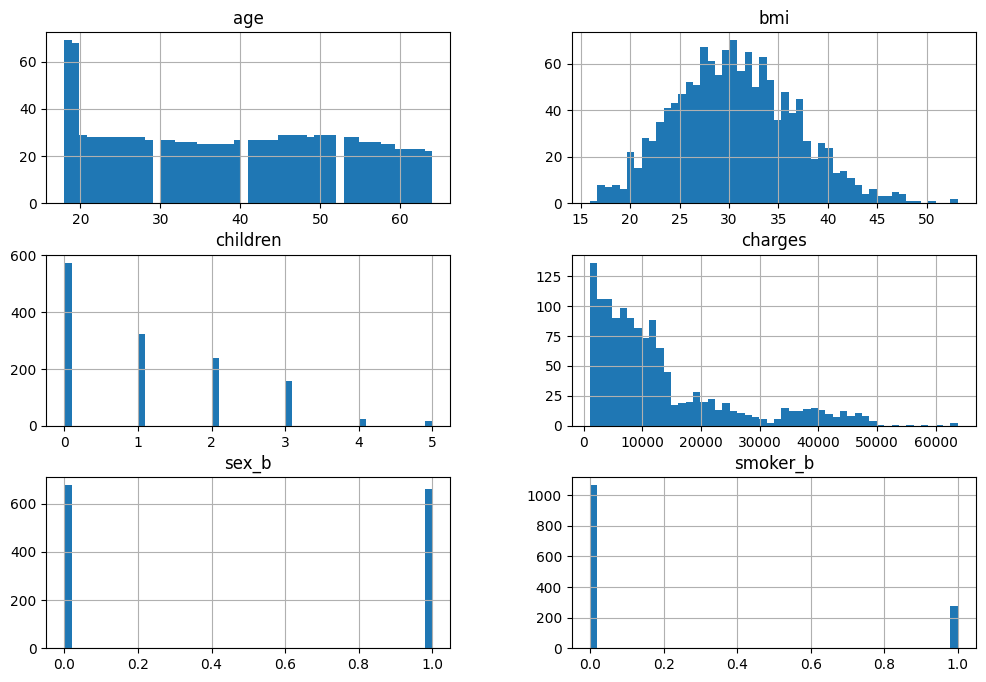

In [6]:
insurance_df.hist(bins=50, figsize=(12, 8))
plt.show()

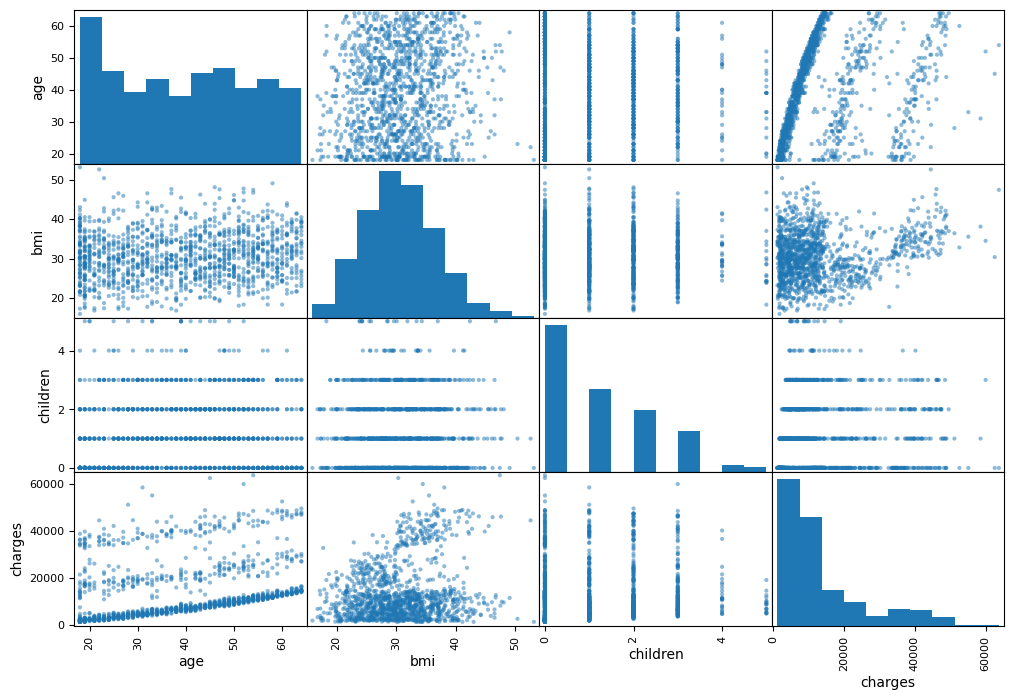

In [7]:
from pandas.plotting import scatter_matrix

attributes = ["age", "bmi", "children","charges"]
scatter_matrix(insurance_df[attributes], figsize=(12, 8))
plt.show()

<Axes: >

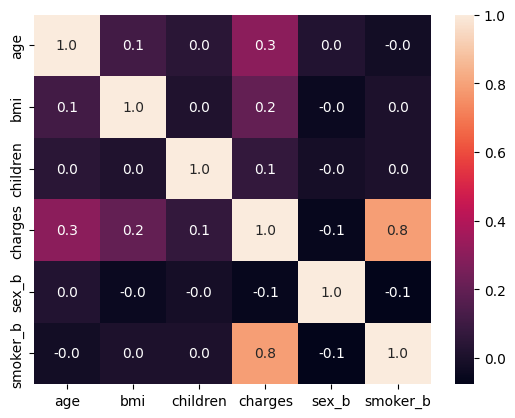

In [8]:
corr_matrix = insurance_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

## splitting

In [9]:
X = insurance_df.drop("charges", inplace=False, axis=1)
Y = insurance_df["charges"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   bmi       1070 non-null   float64
 2   children  1070 non-null   int64  
 3   region    1070 non-null   object 
 4   sex_b     1070 non-null   int64  
 5   smoker_b  1070 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 58.5+ KB


In [12]:
X_train

,age,bmi,children,region,sex_b,smoker_b
560,46,19.950,2,northwest,1,0
1285,47,24.320,0,northeast,1,0
1142,52,24.860,0,southeast,1,0
969,39,34.320,5,southeast,1,0
486,54,21.470,3,northwest,1,0
...,...,...,...,...,...,...
1095,18,31.350,4,northeast,1,0
1130,39,23.870,5,southeast,1,0
1294,58,25.175,0,northeast,0,0
860,37,47.600,2,southwest,1,1


## preprocessing

the data we have is already cleaned

In [13]:
X_train.region.value_counts()

region
southeast    283
northeast    267
southwest    264
northwest    256
Name: count, dtype: int64

In [14]:
X_test.region.value_counts()

region
southeast    81
northwest    69
southwest    61
northeast    57
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_encoder.fit(insurance_df.region.values.reshape(-1, 1))

OneHotEncoder()

In [16]:
train_encoded = cat_encoder.transform(X_train.region.values.reshape(-1, 1))
train_encoded

<1070x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1070 stored elements in Compressed Sparse Row format>

In [17]:
test_encoded = cat_encoder.transform(X_test.region.values.reshape(-1, 1))
test_encoded

<268x4 sparse matrix of type '<class 'numpy.float64'>'
	with 268 stored elements in Compressed Sparse Row format>

In [18]:
train_num = X_train.select_dtypes(include=[np.number])

In [19]:
test_num = X_test.select_dtypes(include=[np.number])

In [20]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(train_num)

StandardScaler()

In [21]:
X_train_scaled = std_scaler.transform(train_num)

In [22]:
X_test_scaled = std_scaler.transform(test_num)

## train and evaluation

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
lr_model.coef_

array([3.61628729e+03, 1.97848617e+03, 5.19291478e+02, 3.97472024e+00,
       9.55960269e+03])

In [26]:
y_predict = lr_model.predict(X_test_scaled)
y_predict

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081, 11097.38383938,   145.27608963, 16746.1683771 ,
         747.53414191, 11153.67590722, 28518.15016561,  9292.18345421,
        5460.51975119, 38510.48013003, 40359.30938604, 37223.40538064,
       15316.56711945, 36047.50032223,  9326.29049907, 31400.1559532 ,
        4269.64414373, 10464.66374097,  2719.9260555 ,  6579.53742551,
       11232.00255515, 12472.06793446, 14807.11281089,  6066.19283362,
        9535.69029723,  2377.6983797 ,  9475.05690885, 12963.23366722,
        4706.09057393,  3414.674504  ,  4815.64981654, 12484.17176954,
        2359.13614479,  9161.02061228, 33238.67621442, 32743.41702445,
        4274.58967205,  4229.5442107 , 14435.36485176, 11384.66898976,
        8925.70468583, 12480.09178788,  5154.45787816,  3554.10047649,
       35649.60942684,  9276.25523701, 15971.35991397,  2552.75200479,
       12162.99980138,  1062.65132285, 13551.43771934, 12103.65505529,
      

In [27]:
charges = pd.DataFrame({'predicted_charges': y_predict,'actual_charges': y_test})
charges

,predicted_charges,actual_charges
764,8554.817116,9095.06825
887,6973.587467,5272.17580
890,36798.604161,29330.98315
1293,9417.882823,9301.89355
259,26871.680311,33750.29180
...,...,...
109,39220.995889,47055.53210
575,11695.634124,12222.89830
535,7253.598675,6067.12675
543,40950.539904,63770.42801


In [28]:
r2_score(y_test, y_predict)

0.7811302113434095

In [29]:
mean_squared_error(y_test, y_predict, squared=False)

5829.17293025419

In [30]:
mean_absolute_error(y_test, y_predict)

4213.484797807139

In [31]:
mean_absolute_percentage_error(y_test, y_predict)

0.4803556784658596